In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('DaNang.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Index,date,pm25,pm10,o3,no2,so2,co,AQI
1361,1361,10-01-2019,86,39,41,11,2,7,86
1362,1362,11-01-2019,100,28,41,11,1,7,100
1363,1363,12-01-2019,79,26,41,11,1,7,79
1364,1364,13-01-2019,74,38,41,11,2,7,74
1365,1365,14-01-2019,97,40,41,11,2,7,97
...,...,...,...,...,...,...,...,...,...
3003,3003,08-09-2023,15,14,33,15,13,2,33
3004,3004,09-09-2023,21,8,31,15,13,2,31
3005,3005,01-01-2024,144,64,41,16,13,5,144
3014,3014,02-01-2024,114,62,41,16,13,3,114


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13943.391, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14300.952, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14156.554, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14066.574, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14298.952, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13941.436, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13982.279, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13943.511, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13943.342, Time=1.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13956.697, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13941.473, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13945.426, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13939.461, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13980.291, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[54.79509835 53.09372634 52.1766242  51.68227238 51.41579855 51.27215935
 51.19473253 51.15299663 51.13049944 51.11837262 51.11183583 51.10831225
 51.10641291 51.1053891  51.10483723 51.10453975 51.1043794  51.10429296
 51.10424637 51.10422125 51.10420772 51.10420042 51.10419649 51.10419437
 51.10419322 51.10419261 51.10419227 51.10419209 51.104192   51.10419195]
Predicted closing prices for the next 60 days:
[54.79509835 53.09372634 52.1766242  51.68227238 51.41579855 51.27215935
 51.19473253 51.15299663 51.13049944 51.11837262 51.11183583 51.10831225
 51.10641291 51.1053891  51.10483723 51.10453975 51.1043794  51.10429296
 51.10424637 51.10422125 51.10420772 51.10420042 51.10419649 51.10419437
 51.10419322 51.10419261 51.10419227 51.10419209 51.104192   51.10419195
 51.10419192 51.1041919  51.1041919  51.10419189 51.10419189 51.10419189
 51.10419189 51.10419189 51.10419189 51.10419189 51.10419189 51.10419189
 51.10419189 51.10419189 51.1

In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 146.74227317898453
MAE: 66.27849597285065
MAPE: 50.15309821098403


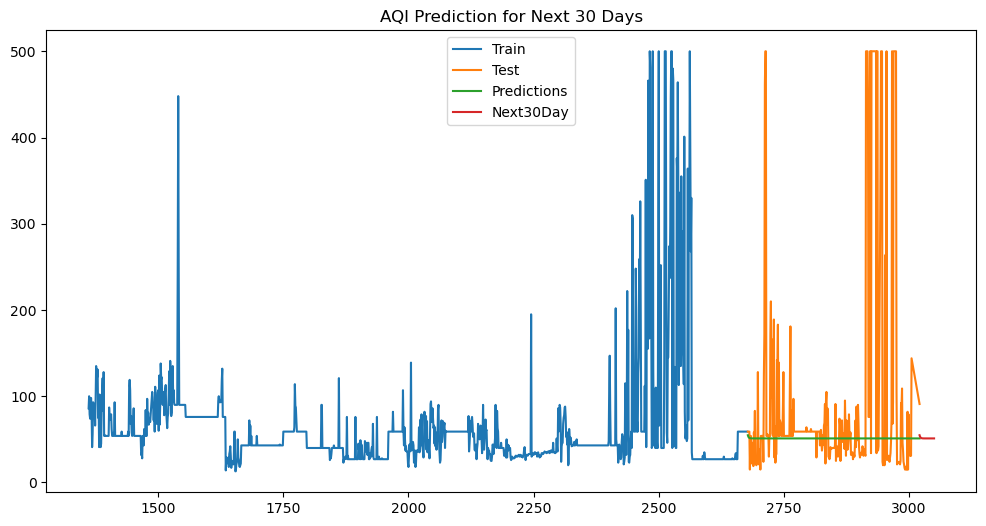

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

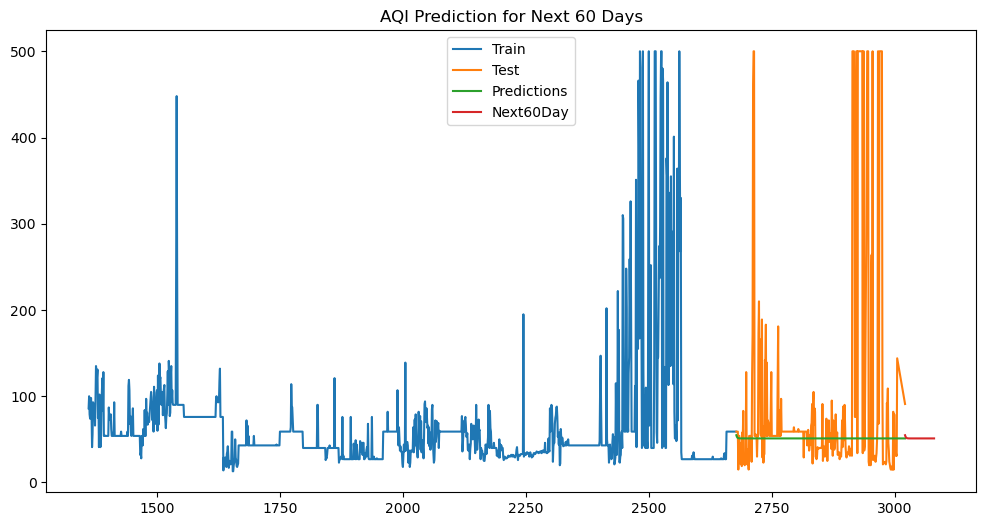

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

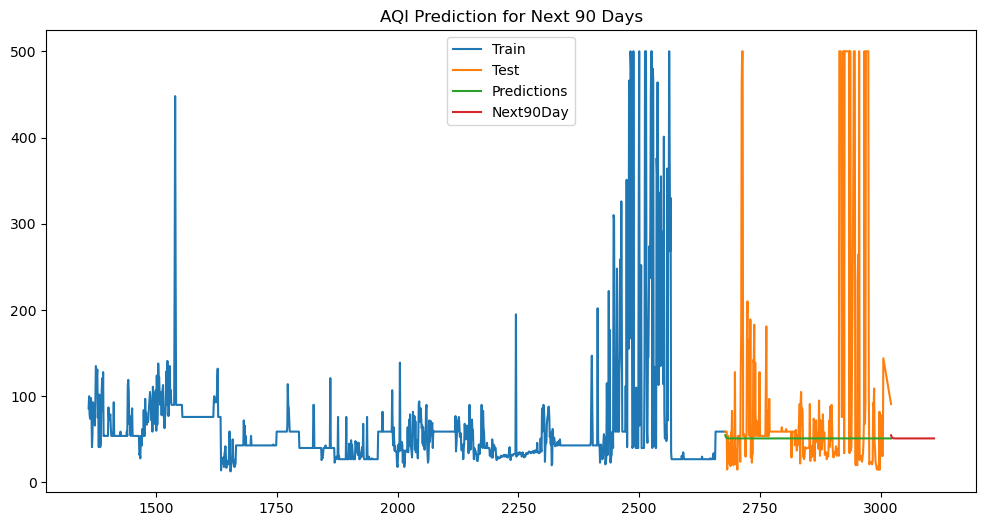

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(7:3)

In [11]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11705.556, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12016.244, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11922.137, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11825.503, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12014.319, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11707.479, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11708.106, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11702.282, Time=1.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11704.079, Time=0.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11701.537, Time=1.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11700.454, Time=1.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11784.902, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=11699.874, Time=1.51 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11768.398, Time=0.26 sec
 ARIMA(5,1,2)(0,0,0

ARIMA(order=(5, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[295.47211623 251.58323881 199.13265291 157.92381652 198.22336256
 167.84150567 168.6941367  197.91151049 161.11402548 182.80658101
 189.05892679 161.02959373 191.58505378 177.85773071 167.41811408
 193.61706703 169.30405563 176.61690169 189.59221082 166.02456695
 184.58369762 182.29676136 168.12184359 188.60294256 175.15151605
 173.66973525 188.01178402 170.7943536  179.86206965 184.01082064]
Predicted closing prices for the next 60 days:
[295.47211623 251.58323881 199.13265291 157.92381652 198.22336256
 167.84150567 168.6941367  197.91151049 161.11402548 182.80658101
 189.05892679 161.02959373 191.58505378 177.85773071 167.41811408
 193.61706703 169.30405563 176.61690169 189.59221082 166.02456695
 184.58369762 182.29676136 168.12184359 188.60294256 175.15151605
 173.66973525 188.01178402 170.7943536  179.86206965 184.01082064
 170.26082666 184.24818306 178.81956688 172.93775916 185.57305994
 174.63063277 177.14271142 183.99218412 172.796

In [13]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 154.76808837475366
MAE: 142.5360513581069
MAPE: 313.90145026218346


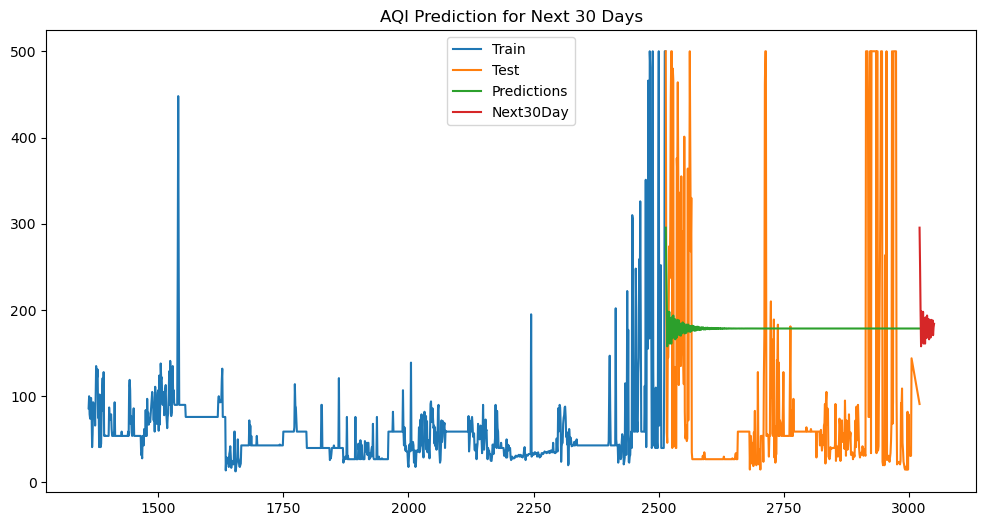

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

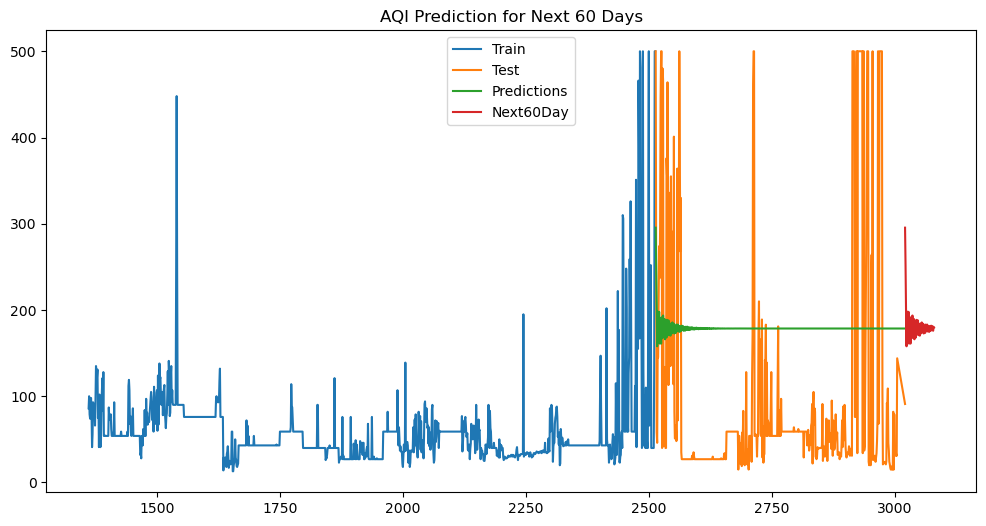

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

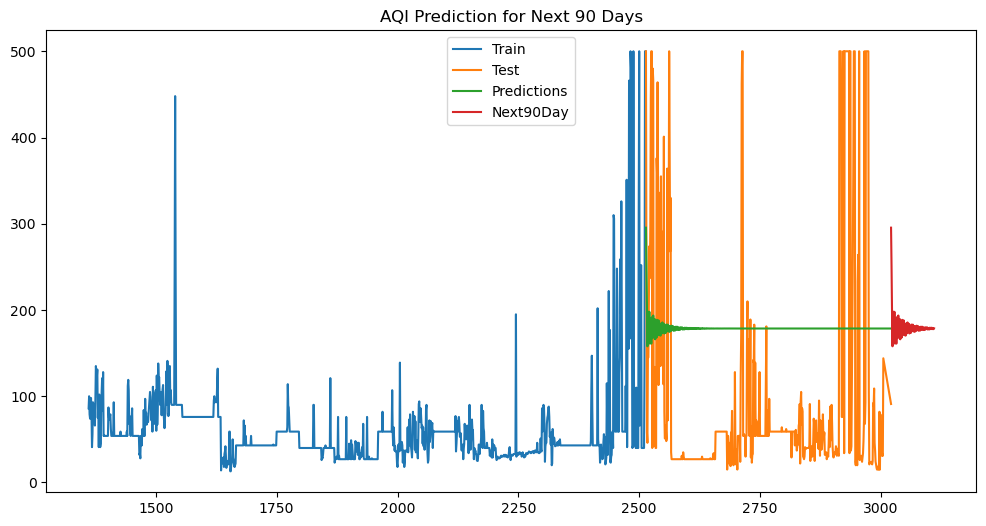

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(9:1)

In [17]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15721.425, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16096.948, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15957.571, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15882.953, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16094.949, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15721.117, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15781.926, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15722.079, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15721.789, Time=1.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15736.055, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15720.718, Time=0.70 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15913.838, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15721.960, Time=1.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15889.457, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[42.43455992 48.07050727 51.17868561 52.83174505 53.7164481  54.189413
 54.44231008 54.57753106 54.6498325  54.68849139 54.70916193 54.72021427
 54.72612385 54.72928365 54.73097316 54.73187653 54.73235955 54.73261782
 54.73275591 54.73282975 54.73286923 54.73289034 54.73290162 54.73290766
 54.73291088 54.73291261 54.73291353 54.73291403 54.73291429 54.73291443]
Predicted closing prices for the next 60 days:
[42.43455992 48.07050727 51.17868561 52.83174505 53.7164481  54.189413
 54.44231008 54.57753106 54.6498325  54.68849139 54.70916193 54.72021427
 54.72612385 54.72928365 54.73097316 54.73187653 54.73235955 54.73261782
 54.73275591 54.73282975 54.73286923 54.73289034 54.73290162 54.73290766
 54.73291088 54.73291261 54.73291353 54.73291403 54.73291429 54.73291443
 54.73291451 54.73291455 54.73291457 54.73291458 54.73291459 54.73291459
 54.73291459 54.73291459 54.73291459 54.73291459 54.73291459 54.73291459
 54.73291459 54.73291459 54.73291

In [19]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 194.27853156773585
MAE: 105.03173400184949
MAPE: 71.57930001621155


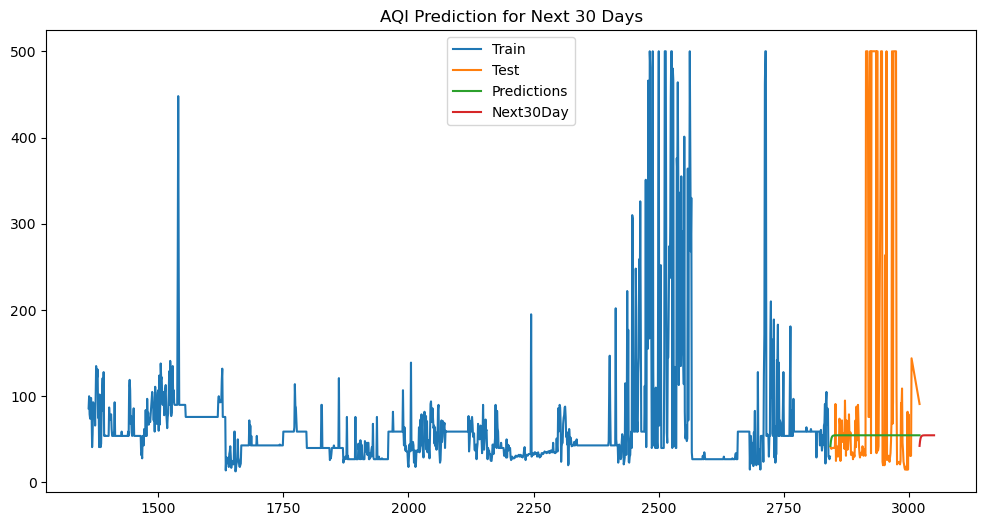

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

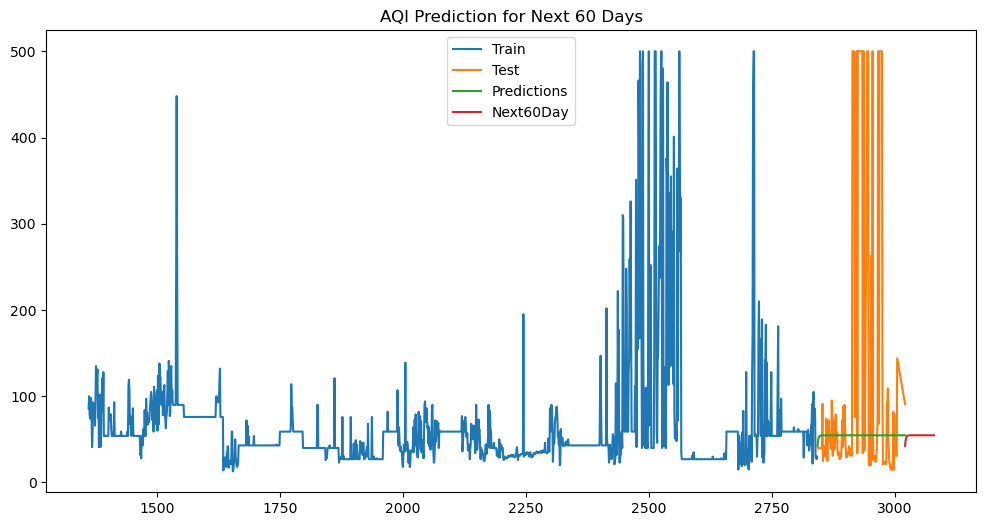

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

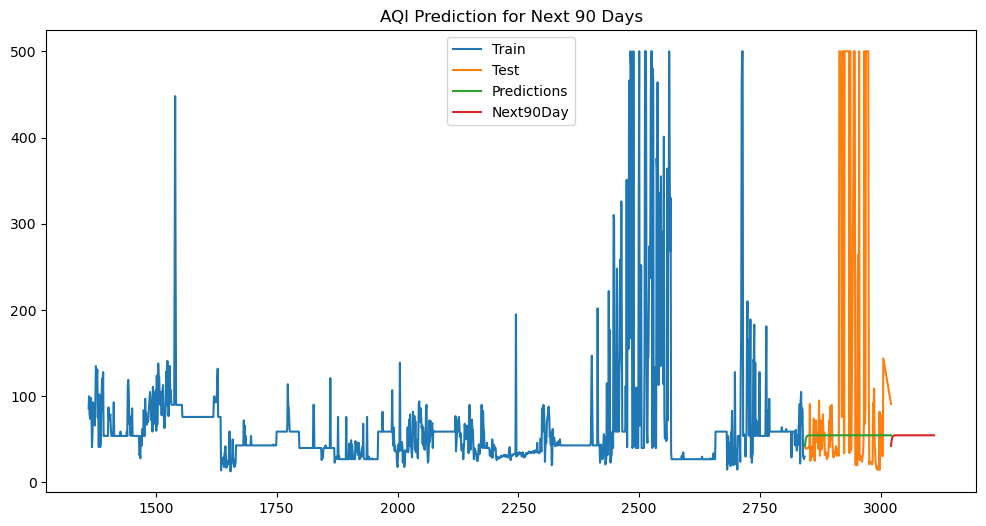

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()